<a href="https://colab.research.google.com/github/janaeam/remote-work-2021/blob/main/Remote_Work_Visualization_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import plotly.express as px

In [2]:
filename = '/content/drive/MyDrive/Coding Dojo/Week_3/Data/2021 State of Remote Work - CompleteData.csv'
remwork = pd.read_csv(filename, header=1)
remwork.head()

,Unnamed: 0,What country do you live in currently?,What industry do you work in?,Other,"In the following list, what best describes the work you do?",Other.1,Which of the following best describes you?,Other.2,How long have you been in the workforce?,How long have you worked remotely?,Do you have a disability or chronic illness?,Is a disability or chronic illness one of the reasons you pursued remote work?,Are you a parent or caregiver?,Is being a parent or caregiver one of the reasons you pursued remote work?,"Would you like to work remotely, at least some of the time, for the rest of your career?",Would you recommend remote work to others?,What’s your biggest struggle with working remotely?,Other.3,What’s the biggest benefit you see to working remotely?,Other.4,Are you working remotely as a result of COVID-19?,Is your company planning on permanently allowing remote work?,When will you be returning to your workspace and no longer be allowed to work remotely?,Was your company's transition to remote work smooth?,What made it smooth?,Why not?,What has changed the most about your work now that you work remotely?,Other.5,Would you say you are working less or more now that you work remotely?,Do you find you are in more meetings as a result of the shift to remote work?,Is there anything else you'd like to add about how your work has changed now that you work remotely?,Which description best suits you?,Is your company operating in multiple time zones?,How many time zones do employees at your company span?,Are people on your immediate team in multiple time zones?,Does your company encourage asynchronous communication? (Asynchronous communication simply means that work doesn’t happen at the same time for everyone. E.g. On video calls.),How many full-time employees does your company have?,What percentage of your company works remotely?,"If you work from home, does your company pay for your home internet?",\nDoes your company pay for your cell phone?,Does your company cover the cost of a coworking membership?,Does your company cover your necessary hardware needs (e.g. a laptop or desktop computer)?,Does your company cover your necessary software needs?,Are there any other costs of working remotely that your company covers?,Anything else you want to add that we didn’t ask about?
0,NaN,United States,Education,NaN,Leadership,NaN,Black or African American,NaN,10 years - 14 years,1 year to 4 years,0.0,NaN,1.0,0.0,1.0,1.0,Distractions at home,NaN,Ability to spend time with family,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employee,0.0,NaN,NaN,1.0,"More than 1,001",100%,No,Partially,No,Yes,Yes,NaN,NaN
1,NaN,Canada,Software,NaN,NaN,Executive,White,NaN,15 years - 19 years,Less than six months,0.0,NaN,1.0,0.0,1.0,1.0,Difficulties with collaboration and communication,NaN,Not having to commute,NaN,1.0,Yes,NaN,1.0,Already well equites with remote software stack,NaN,My work hours,NaN,I'm working more,1.0,No,Employee,1.0,2-5 time zones,1.0,1.0,101 to 500,76 to 99%,No,Yes,No,Yes,Yes,No,No
2,NaN,India,IT and Services,NaN,Sales,NaN,Asian or Pacific Islander,NaN,5 years - 9 years,6 months to 11 months,0.0,NaN,1.0,1.0,1.0,1.0,Distractions at home,NaN,Ability to spend time with family,NaN,1.0,I don't know,NaN,1.0,Nature of business,NaN,I’m now acting as my child(ren)’s caretaker/te...,NaN,I'm working more,0.0,"As much as I love work from home, the nature o...",Employee,1.0,2-5 time zones,1.0,0.0,51 to 100,100%,Partially,No,No,Yes,Yes,No,Nope!
3,NaN,Brazil,NaN,Energy,Leadership,NaN,Hispanic or Latino,NaN,5 years - 9 years,1 year to 4 years,0.0,NaN,1.0,1.0,1.0,1.0,Not being able to unplug,NaN,Flexibility to work from any location,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Freelancer / Self-employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,United States,IT and Services,NaN,Customer Support,NaN,White,NaN,More than 20 years,More than 10 years,0.0,NaN,0.0,NaN,1.0,1.0,Not being able to unplug,NaN,Flexibility to work from any location,NaN,1.

In [3]:
remwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 45 columns):
 #   Column                                                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                                                          --------------  -----  
 0   Unnamed: 0                                                                                                                                                                      0 non-null      float64
 1   What country do you live in currently?                                                                                                                                          2218 non-null   object 
 2   What industry do you work in?                                       

In [4]:
remwork["Is there anything else you'd like to add about how your work has changed now that you work remotely?"].value_counts()

No                                                                                                                                                                                        124
no                                                                                                                                                                                         36
Nope                                                                                                                                                                                        7
Nothing                                                                                                                                                                                     5
.                                                                                                                                                                                           5
                                                  

In [5]:
remwork['Anything else you want to add that we didn’t ask about?'].value_counts()

No                                                                                                                                                                        455
no                                                                                                                                                                        198
Nope                                                                                                                                                                       70
nope                                                                                                                                                                       35
-                                                                                                                                                                          20
                                                                                                                                  

In [6]:
remote = remwork.drop(columns = (['Unnamed: 0', 'Anything else you want to add that we didn’t ask about?', "Is there anything else you'd like to add about how your work has changed now that you work remotely?"]))

In [8]:
remote.dropna(how='all', inplace=True)

In [9]:
remote.head()

,What country do you live in currently?,What industry do you work in?,Other,"In the following list, what best describes the work you do?",Other.1,Which of the following best describes you?,Other.2,How long have you been in the workforce?,How long have you worked remotely?,Do you have a disability or chronic illness?,Is a disability or chronic illness one of the reasons you pursued remote work?,Are you a parent or caregiver?,Is being a parent or caregiver one of the reasons you pursued remote work?,"Would you like to work remotely, at least some of the time, for the rest of your career?",Would you recommend remote work to others?,What’s your biggest struggle with working remotely?,Other.3,What’s the biggest benefit you see to working remotely?,Other.4,Are you working remotely as a result of COVID-19?,Is your company planning on permanently allowing remote work?,When will you be returning to your workspace and no longer be allowed to work remotely?,Was your company's transition to remote work smooth?,What made it smooth?,Why not?,What has changed the most about your work now that you work remotely?,Other.5,Would you say you are working less or more now that you work remotely?,Do you find you are in more meetings as a result of the shift to remote work?,Which description best suits you?,Is your company operating in multiple time zones?,How many time zones do employees at your company span?,Are people on your immediate team in multiple time zones?,Does your company encourage asynchronous communication? (Asynchronous communication simply means that work doesn’t happen at the same time for everyone. E.g. On video calls.),How many full-time employees does your company have?,What percentage of your company works remotely?,"If you work from home, does your company pay for your home internet?",\nDoes your company pay for your cell phone?,Does your company cover the cost of a coworking membership?,Does your company cover your necessary hardware needs (e.g. a laptop or desktop computer)?,Does your company cover your necessary software needs?,Are there any other costs of working remotely that your company covers?
0,United States,Education,NaN,Leadership,NaN,Black or African American,NaN,10 years - 14 years,1 year to 4 years,0.0,NaN,1.0,0.0,1.0,1.0,Distractions at home,NaN,Ability to spend time with family,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employee,0.0,NaN,NaN,1.0,"More than 1,001",100%,No,Partially,No,Yes,Yes,NaN
1,Canada,Software,NaN,NaN,Executive,White,NaN,15 years - 19 years,Less than six months,0.0,NaN,1.0,0.0,1.0,1.0,Difficulties with collaboration and communication,NaN,Not having to commute,NaN,1.0,Yes,NaN,1.0,Already well equites with remote software stack,NaN,My work hours,NaN,I'm working more,1.0,Employee,1.0,2-5 time zones,1.0,1.0,101 to 500,76 to 99%,No,Yes,No,Yes,Yes,No
2,India,IT and Services,NaN,Sales,NaN,Asian or Pacific Islander,NaN,5 years - 9 years,6 months to 11 months,0.0,NaN,1.0,1.0,1.0,1.0,Distractions at home,NaN,Ability to spend time with family,NaN,1.0,I don't know,NaN,1.0,Nature of business,NaN,I’m now acting as my child(ren)’s caretaker/te...,NaN,I'm working more,0.0,Employee,1.0,2-5 time zones,1.0,0.0,51 to 100,100%,Partially,No,No,Yes,Yes,No
3,Brazil,NaN,Energy,Leadership,NaN,Hispanic or Latino,NaN,5 years - 9 years,1 year to 4 years,0.0,NaN,1.0,1.0,1.0,1.0,Not being able to unplug,NaN,Flexibility to work from any location,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Freelancer / Self-employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,IT and Services,NaN,Customer Support,NaN,White,NaN,More than 20 years,More than 10 years,0.0,NaN,0.0,NaN,1.0,1.0,Not being able to unplug,NaN,Flexibility to work from any location,NaN,1.0,Yes,NaN,1.0,Self-employed IT Consultant,NaN,My work hours,NaN,I'm working the same amount,0.0,Freelancer / Self-employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
otherind_filter = remote['Other']
otherind_filter.value_counts()

Consulting                     8
Energy                         5
Manufacturing                  5
HR                             3
Real Estate                    3
                              ..
fitness                        1
Construction + Real Estate     1
Events & Marketing             1
Tech - community management    1
administrative                 1
Name: Other, Length: 114, dtype: int64

In [11]:
remote = remote.rename(columns= {'What industry do you work in?' : 'What_industry',
                       'In the following list, what best describes the work you do?' : 'Job_desc',
                       'How long have you been in the workforce?' : 'Total_years_worked',
                       'How long have you worked remotely?' : 'Years_worked_remotely'})

In [12]:
remote['What_industry'] = remote['What_industry'].fillna(' ')
print(remote['What_industry'].value_counts())
print(remote['What_industry'].count())

Software                  821
IT and Services           403
Marketing                 240
                          149
Financial Services        111
Education                  95
Media and Publishing       87
Non-profit                 76
E-commerce                 57
Consumer products          56
Medical and Healthcare     47
Government                 37
Travel and Tourism         29
Law and Legal Services     10
Name: What_industry, dtype: int64
2218


In [13]:
remote['Other'] = remote['Other'].fillna(' ')
remote['Other'].value_counts()

                               2069
Consulting                        8
Energy                            5
Manufacturing                     5
HR                                3
                               ... 
fitness                           1
Construction + Real Estate        1
Events & Marketing                1
Tech - community management       1
administrative                    1
Name: Other, Length: 115, dtype: int64

In [14]:
remote.insert(3, 'Industry', remote['What_industry'] + ' ' + remote['Other'])
remote.head()

,What country do you live in currently?,What_industry,Other,Industry,Job_desc,Other.1,Which of the following best describes you?,Other.2,Total_years_worked,Years_worked_remotely,Do you have a disability or chronic illness?,Is a disability or chronic illness one of the reasons you pursued remote work?,Are you a parent or caregiver?,Is being a parent or caregiver one of the reasons you pursued remote work?,"Would you like to work remotely, at least some of the time, for the rest of your career?",Would you recommend remote work to others?,What’s your biggest struggle with working remotely?,Other.3,What’s the biggest benefit you see to working remotely?,Other.4,Are you working remotely as a result of COVID-19?,Is your company planning on permanently allowing remote work?,When will you be returning to your workspace and no longer be allowed to work remotely?,Was your company's transition to remote work smooth?,What made it smooth?,Why not?,What has changed the most about your work now that you work remotely?,Other.5,Would you say you are working less or more now that you work remotely?,Do you find you are in more meetings as a result of the shift to remote work?,Which description best suits you?,Is your company operating in multiple time zones?,How many time zones do employees at your company span?,Are people on your immediate team in multiple time zones?,Does your company encourage asynchronous communication? (Asynchronous communication simply means that work doesn’t happen at the same time for everyone. E.g. On video calls.),How many full-time employees does your company have?,What percentage of your company works remotely?,"If you work from home, does your company pay for your home internet?",\nDoes your company pay for your cell phone?,Does your company cover the cost of a coworking membership?,Does your company cover your necessary hardware needs (e.g. a laptop or desktop computer)?,Does your company cover your necessary software needs?,Are there any other costs of working remotely that your company covers?
0,United States,Education,,Education,Leadership,NaN,Black or African American,NaN,10 years - 14 years,1 year to 4 years,0.0,NaN,1.0,0.0,1.0,1.0,Distractions at home,NaN,Ability to spend time with family,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employee,0.0,NaN,NaN,1.0,"More than 1,001",100%,No,Partially,No,Yes,Yes,NaN
1,Canada,Software,,Software,NaN,Executive,White,NaN,15 years - 19 years,Less than six months,0.0,NaN,1.0,0.0,1.0,1.0,Difficulties with collaboration and communication,NaN,Not having to commute,NaN,1.0,Yes,NaN,1.0,Already well equites with remote software stack,NaN,My work hours,NaN,I'm working more,1.0,Employee,1.0,2-5 time zones,1.0,1.0,101 to 500,76 to 99%,No,Yes,No,Yes,Yes,No
2,India,IT and Services,,IT and Services,Sales,NaN,Asian or Pacific Islander,NaN,5 years - 9 years,6 months to 11 months,0.0,NaN,1.0,1.0,1.0,1.0,Distractions at home,NaN,Ability to spend time with family,NaN,1.0,I don't know,NaN,1.0,Nature of business,NaN,I’m now acting as my child(ren)’s caretaker/te...,NaN,I'm working more,0.0,Employee,1.0,2-5 time zones,1.0,0.0,51 to 100,100%,Partially,No,No,Yes,Yes,No
3,Brazil,,Energy,Energy,Leadership,NaN,Hispanic or Latino,NaN,5 years - 9 years,1 year to 4 years,0.0,NaN,1.0,1.0,1.0,1.0,Not being able to unplug,NaN,Flexibility to work from any location,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Freelancer / Self-employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,IT and Services,,IT and Services,Customer Support,NaN,White,NaN,More than 20 years,More than 10 years,0.0,NaN,0.0,NaN,1.0,1.0,Not being able to unplug,NaN,Flexibility to work from any location,NaN,1.0,Yes,NaN,1.0,Self-employed IT Consultant,NaN,My work hours,NaN,I'm working the same amount,0.0,Freelancer / Self-employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
remote['Industry'] = remote['Industry'].str.strip()

In [16]:
remote['Industry'].value_counts()

Software                        821
IT and Services                 403
Marketing                       241
Financial Services              111
Education                        95
                               ... 
Website Design & Development      1
Business Consulting               1
Art (theatre)                     1
fitness                           1
Recruitment                       1
Name: Industry, Length: 126, dtype: int64

In [17]:
remote['What_industry'] = remote['What_industry'].replace(' ', 'Other')
remote['What_industry'].value_counts()

Software                  821
IT and Services           403
Marketing                 240
Other                     149
Financial Services        111
Education                  95
Media and Publishing       87
Non-profit                 76
E-commerce                 57
Consumer products          56
Medical and Healthcare     47
Government                 37
Travel and Tourism         29
Law and Legal Services     10
Name: What_industry, dtype: int64

In [18]:
remote['Job_desc'].value_counts()

Engineering                  725
Marketing and Advertising    398
Leadership                   193
Design                       157
Product                      143
Operations                   133
Customer Support              94
Human Resources               73
Data                          66
Sales                         56
Finances                      48
Name: Job_desc, dtype: int64

In [19]:
remote['Other.1'].value_counts()

Research                                                                                            7
Communications                                                                                      3
Consulting                                                                                          3
Content                                                                                             3
Project Management                                                                                  3
                                                                                                   ..
Program Management                                                                                  1
Legal                                                                                               1
Education/Teaching                                                                                  1
Volunteer support, organisational support for volunteers, promoting volunteer oppo

In [20]:
remote['Job_desc'] = remote['Job_desc'].fillna('Other')
remote['Job_desc'].value_counts()

Engineering                  725
Marketing and Advertising    398
Leadership                   193
Design                       157
Product                      143
Operations                   133
Other                        132
Customer Support              94
Human Resources               73
Data                          66
Sales                         56
Finances                      48
Name: Job_desc, dtype: int64

In [21]:
remote.head()

,What country do you live in currently?,What_industry,Other,Industry,Job_desc,Other.1,Which of the following best describes you?,Other.2,Total_years_worked,Years_worked_remotely,Do you have a disability or chronic illness?,Is a disability or chronic illness one of the reasons you pursued remote work?,Are you a parent or caregiver?,Is being a parent or caregiver one of the reasons you pursued remote work?,"Would you like to work remotely, at least some of the time, for the rest of your career?",Would you recommend remote work to others?,What’s your biggest struggle with working remotely?,Other.3,What’s the biggest benefit you see to working remotely?,Other.4,Are you working remotely as a result of COVID-19?,Is your company planning on permanently allowing remote work?,When will you be returning to your workspace and no longer be allowed to work remotely?,Was your company's transition to remote work smooth?,What made it smooth?,Why not?,What has changed the most about your work now that you work remotely?,Other.5,Would you say you are working less or more now that you work remotely?,Do you find you are in more meetings as a result of the shift to remote work?,Which description best suits you?,Is your company operating in multiple time zones?,How many time zones do employees at your company span?,Are people on your immediate team in multiple time zones?,Does your company encourage asynchronous communication? (Asynchronous communication simply means that work doesn’t happen at the same time for everyone. E.g. On video calls.),How many full-time employees does your company have?,What percentage of your company works remotely?,"If you work from home, does your company pay for your home internet?",\nDoes your company pay for your cell phone?,Does your company cover the cost of a coworking membership?,Does your company cover your necessary hardware needs (e.g. a laptop or desktop computer)?,Does your company cover your necessary software needs?,Are there any other costs of working remotely that your company covers?
0,United States,Education,,Education,Leadership,NaN,Black or African American,NaN,10 years - 14 years,1 year to 4 years,0.0,NaN,1.0,0.0,1.0,1.0,Distractions at home,NaN,Ability to spend time with family,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employee,0.0,NaN,NaN,1.0,"More than 1,001",100%,No,Partially,No,Yes,Yes,NaN
1,Canada,Software,,Software,Other,Executive,White,NaN,15 years - 19 years,Less than six months,0.0,NaN,1.0,0.0,1.0,1.0,Difficulties with collaboration and communication,NaN,Not having to commute,NaN,1.0,Yes,NaN,1.0,Already well equites with remote software stack,NaN,My work hours,NaN,I'm working more,1.0,Employee,1.0,2-5 time zones,1.0,1.0,101 to 500,76 to 99%,No,Yes,No,Yes,Yes,No
2,India,IT and Services,,IT and Services,Sales,NaN,Asian or Pacific Islander,NaN,5 years - 9 years,6 months to 11 months,0.0,NaN,1.0,1.0,1.0,1.0,Distractions at home,NaN,Ability to spend time with family,NaN,1.0,I don't know,NaN,1.0,Nature of business,NaN,I’m now acting as my child(ren)’s caretaker/te...,NaN,I'm working more,0.0,Employee,1.0,2-5 time zones,1.0,0.0,51 to 100,100%,Partially,No,No,Yes,Yes,No
3,Brazil,Other,Energy,Energy,Leadership,NaN,Hispanic or Latino,NaN,5 years - 9 years,1 year to 4 years,0.0,NaN,1.0,1.0,1.0,1.0,Not being able to unplug,NaN,Flexibility to work from any location,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Freelancer / Self-employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,IT and Services,,IT and Services,Customer Support,NaN,White,NaN,More than 20 years,More than 10 years,0.0,NaN,0.0,NaN,1.0,1.0,Not being able to unplug,NaN,Flexibility to work from any location,NaN,1.0,Yes,NaN,1.0,Self-employed IT Consultant,NaN,My work hours,NaN,I'm working the same amount,0.0,Freelancer / Self-employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print(remote['Would you recommend remote work to others?'].value_counts())
print(remote['Would you recommend remote work to others?'].isna().sum())

1.0    2150
0.0      68
Name: Would you recommend remote work to others?, dtype: int64
0


In [35]:
dups = remote.duplicated() == True

remote[dups]

,What country do you live in currently?,What_industry,Other,Industry,Job_desc,Other.1,Which of the following best describes you?,Other.2,Total_years_worked,Years_worked_remotely,Do you have a disability or chronic illness?,Is a disability or chronic illness one of the reasons you pursued remote work?,Are you a parent or caregiver?,Is being a parent or caregiver one of the reasons you pursued remote work?,"Would you like to work remotely, at least some of the time, for the rest of your career?",Would you recommend remote work to others?,What’s your biggest struggle with working remotely?,Other.3,What’s the biggest benefit you see to working remotely?,Other.4,Are you working remotely as a result of COVID-19?,Is your company planning on permanently allowing remote work?,When will you be returning to your workspace and no longer be allowed to work remotely?,Was your company's transition to remote work smooth?,What made it smooth?,Why not?,What has changed the most about your work now that you work remotely?,Other.5,Would you say you are working less or more now that you work remotely?,Do you find you are in more meetings as a result of the shift to remote work?,Which description best suits you?,Is your company operating in multiple time zones?,How many time zones do employees at your company span?,Are people on your immediate team in multiple time zones?,Does your company encourage asynchronous communication? (Asynchronous communication simply means that work doesn’t happen at the same time for everyone. E.g. On video calls.),How many full-time employees does your company have?,What percentage of your company works remotely?,"If you work from home, does your company pay for your home internet?",\nDoes your company pay for your cell phone?,Does your company cover the cost of a coworking membership?,Does your company cover your necessary hardware needs (e.g. a laptop or desktop computer)?,Does your company cover your necessary software needs?,Are there any other costs of working remotely that your company covers?
1242,France,Media and Publishing,,Media and Publishing,Marketing and Advertising,NaN,White,NaN,More than 20 years,1 year to 4 years,0.0,NaN,1.0,1.0,1.0,1.0,Not being able to unplug,NaN,Ability to spend time with family,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Freelancer / Self-employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
remote.drop_duplicates(inplace=True)

In [45]:
print(remote['Total_years_worked'].value_counts())
print(remote['Total_years_worked'].isna().sum())

5 years - 9 years       574
10 years - 14 years     512
1 year - 4 years        355
15 years - 19 years     347
More than 20 years      330
6 months - 11 months     53
Less than six months     46
Name: Total_years_worked, dtype: int64
0


In [44]:
print(remote['Years_worked_remotely'].value_counts())
print(remote['Years_worked_remotely'].isna().sum())

1 year to 4 years        748
6 months to 11 months    712
5 years - 9 years        431
Less than six months     174
More than 10 years       152
Name: Years_worked_remotely, dtype: int64
0


In [43]:
print(remote['Would you recommend remote work to others?'].value_counts())
print(remote['Would you recommend remote work to others?'].isna().sum())

1.0    2149
0.0      68
Name: Would you recommend remote work to others?, dtype: int64
0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

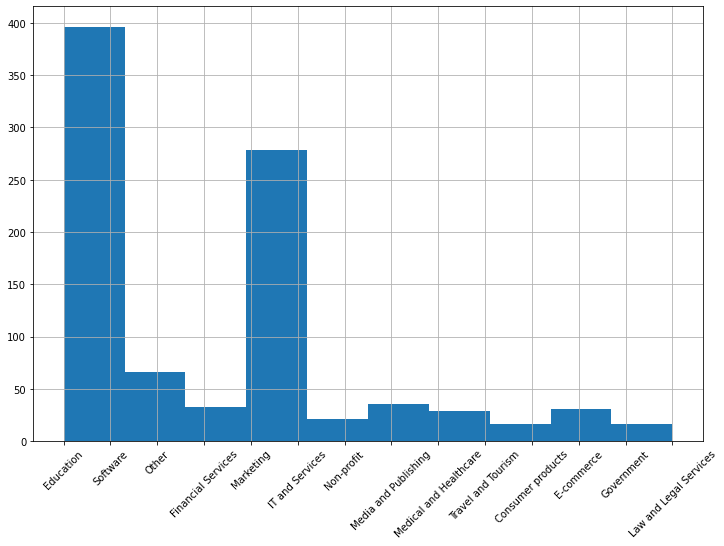

In [90]:
remoteyrs = (remote['Years_worked_remotely'] == 'Less than six months') | (remote['Years_worked_remotely'] == '6 months - 11 months') | (remote['Years_worked_remotely'] == '1 year to 4 years')
workingyrs = (remote['Total_years_worked'] == 'Less than six months') | (remote['Total_years_worked'] == '6 months - 11 months') | (remote['Total_years_worked'] == '1 year to 4 years')

plt.figure(figsize=(12, 8))
remote.loc[remoteyrs, 'What_industry'].hist()
plt.xticks(rotation=45)

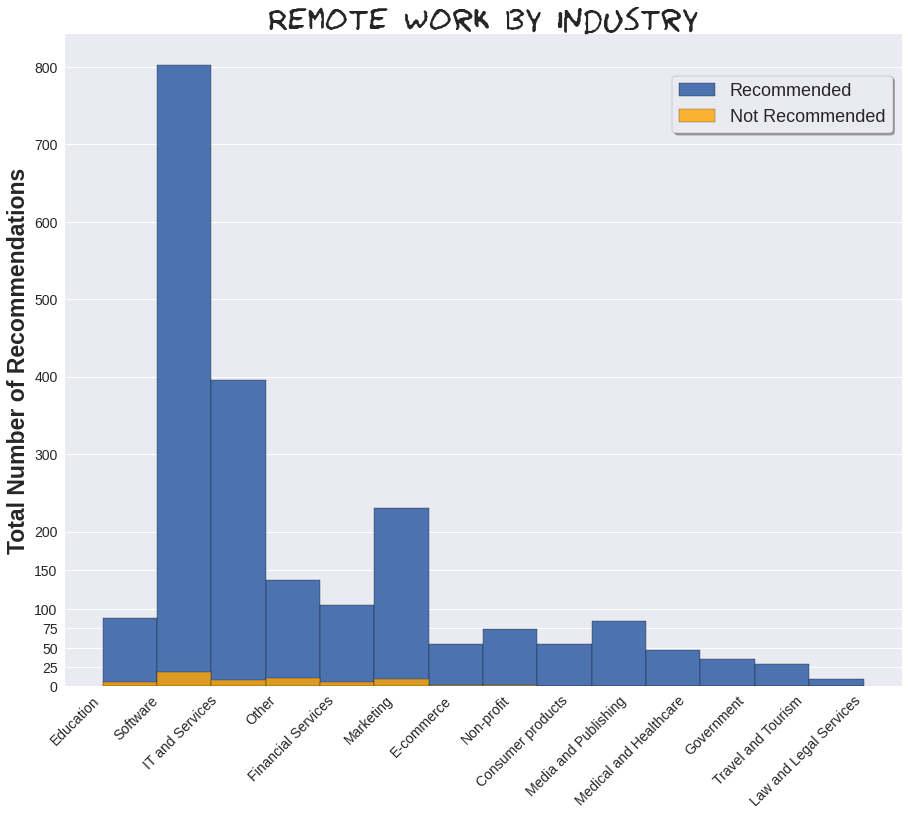

In [254]:
recommend = remote['Would you recommend remote work to others?'] == 1

plt.style.use('seaborn')
plt.figure(figsize=(15,12))
remote.loc[recommend, 'What_industry'].hist(bins=14,edgecolor='black', label='Recommended')
remote.loc[~recommend, 'What_industry'].hist(bins=14, edgecolor='black', color='orange', 
                                             alpha=.8, label='Not Recommended')
plt.grid(axis='x')
plt.xticks(ha='right', rotation=45, fontsize=14, fontweight=500);
plt.yticks(np.array([0,25,50,75,100,150,200,300,400,500,600,700,800]), fontsize=14);
plt.title('Remote Work by Industry', fontsize=32, fontweight= 1000, fontfamily='fantasy')
plt.ylabel('Total Number of Recommendations', fontsize=23, fontweight=600, fontfamily='sans-serif')
plt.legend(bbox_to_anchor=(1,.95), 
           edgecolor= 'gray', 
           shadow=True, frameon=True, 
           fontsize = 18, fancybox=True);

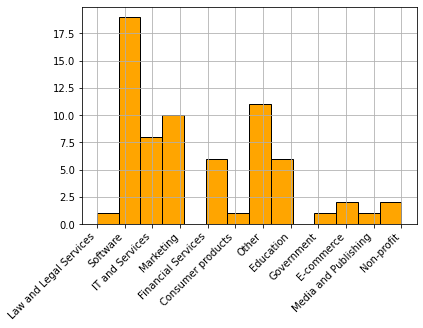

In [196]:
remote.loc[~recommend, 'What_industry'].hist(bins=14, edgecolor='black', color='orange')
plt.xticks(ha= 'right', rotation=45);